In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
#import cifar10
#set tranform test and train

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='.dataset', train = True, download = True, transform = transform )
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root= '.dataset', train = False, download = True, transform = transform  )
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle = True, num_workers=8 )

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

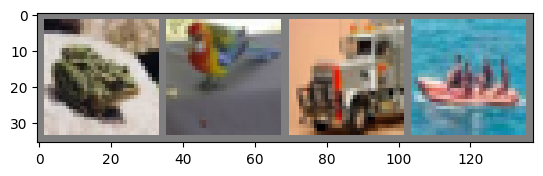

frog  bird  truck ship 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

batch_size = 4

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

X_train_2D = torch.stack([img for img, _ in trainset]).view(len(trainset), -1).numpy()
y_train_2D = np.array([label for _, label in trainset])

X_test_2D = torch.stack([img for img, _ in testset]).view(len(testset), -1).numpy()
y_test_2D = np.array([label for _, label in testset])

print("Train:", X_train_2D.shape, y_train_2D.shape)
print("Test :", X_test_2D.shape,  y_test_2D.shape)


Train: (50000, 3072) (50000,)
Test : (10000, 3072) (10000,)


In [5]:
knn1 = KNeighborsClassifier(n_neighbors=1,metric = 'cosine') 
knn1.fit(X_train_2D, y_train_2D)
acc1 = knn1.score(X_test_2D, y_test_2D)

print(acc1)

0.4093


In [6]:
knn3 = KNeighborsClassifier(n_neighbors=19,metric = 'cosine')
knn3.fit(X_train_2D, y_train_2D)
acc3 = knn3.score(X_test_2D, y_test_2D)

print(acc3)

0.436


In [7]:
nc = NearestCentroid()
nc.fit(X_train_2D, y_train_2D)
acc_nc = nc.score(X_test_2D, y_test_2D)

print(acc_nc)

0.2774


In [8]:
k_values = [1, 3, 5, 7, 11, 15, 19, 21, 23, 33, 43, 53, 73, 83, 103]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'cosine')
    knn.fit(X_train_2D, y_train_2D)
    acc = knn.score(X_test_2D, y_test_2D)
    print(acc)

0.4093
0.4039
0.4229
0.4301
0.4275
0.4308
0.436
0.4359
0.4344
0.4255
0.4257
0.4239
0.4177
0.4153
0.4075
